In [1]:
import numpy as np
import matplotlib.pyplot as plt

from deconv import utils
from deconv.deconv import Deconv

from tqdm import tqdm_notebook as tqdm

In [2]:
N = 380
T = 360
dt = 0.020
lam = 0.1
tau = 1.5
sigma = 0.2

In [3]:
S,C,F = utils.generate_data(N, T, dt=dt, lam=lam, tau=tau, sigma=sigma)

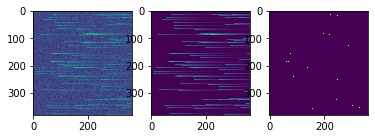

In [4]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(F)
ax[1].imshow(C)
ax[2].imshow(S)

In [5]:
D = Deconv({})

In [81]:
# descritized binning,
d,v = D.discretize(F, bins=[0.75], high_pass=True)

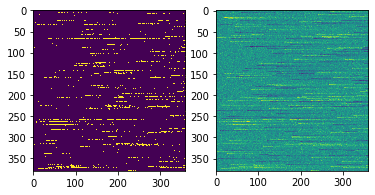

In [82]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(d)
ax[1].imshow(v)

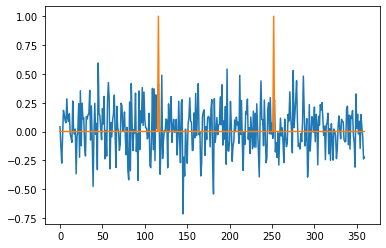

In [83]:
plt.plot(F[50])
plt.plot(d[50])

In [84]:
# wiener filter,
nC = [D.wiener(F[i],dt=dt,iter_max=100) for i in tqdm(range(N))]
n = [w[0] for w in tqdm(nC)]; C = [w[1] for w in tqdm(nC)]
n = np.stack(n); C = np.stack(C)

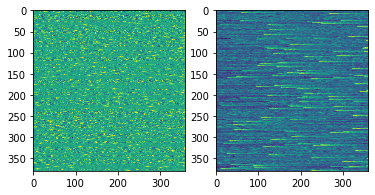

In [85]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(n)
ax[1].imshow(C)

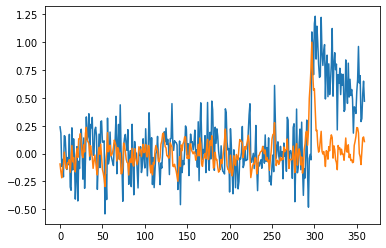

In [86]:
plt.plot(F[0])
plt.plot(n[0])

In [ ]:
# FOOPSI-constrained
Invalid result

In [6]:
# FOOPSI
cFs = [D.constrained_foopsi(F[i],p=1) for i in tqdm(range(N))]

In [7]:
c = np.stack([cF[0] for cF in tqdm(cFs)]); sp = np.stack([cF[-2] for cF in tqdm(cFs)]);

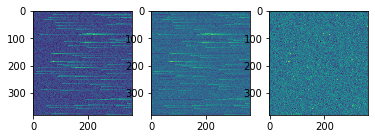

In [11]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(F)
ax[1].imshow(c)
ax[2].imshow(sp)

In [ ]:
# FOOPSI-thresholded
Invalid result